In [1]:
import pandas as pd
import warnings
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from datetime import datetime
# import cv21d
from scipy.integrate import solve_ivp
# Init
warnings.simplefilter(action='ignore', category=FutureWarning)
interp_time = 0.1 # interpolation time [s]
plt.rcParams['font.size'] = 12

<Axes: >

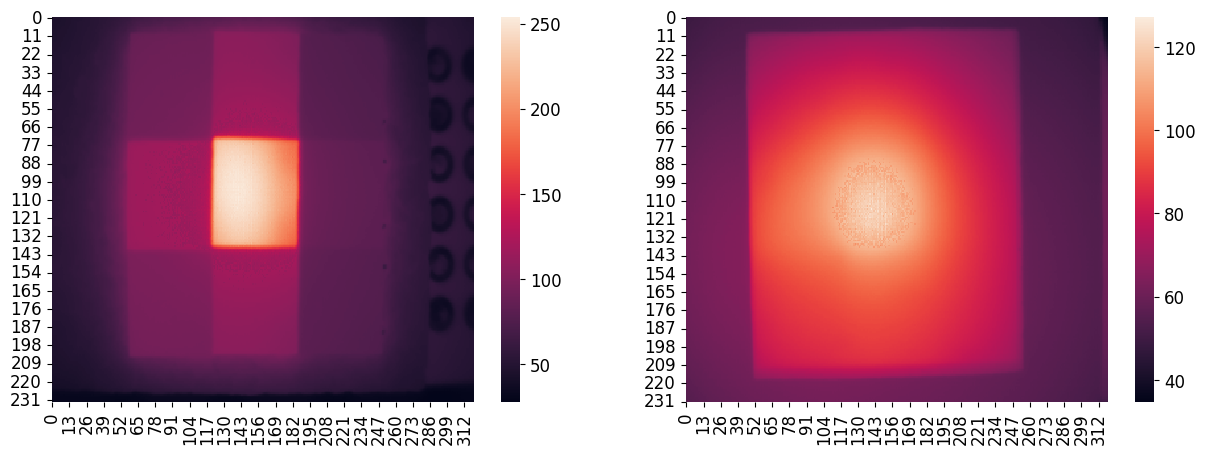

In [8]:
_, axs = plt.subplots(1,2,figsize= (15,5), sharex= False, sharey=False)
axs = axs.ravel()

frames = pd.read_pickle("D:/{}".format("Data_PKL\A1@PWM30-St100um-tape"))
sn.heatmap(frames.img[len(frames)-1], ax=axs[1])

frames = pd.read_pickle("D:/{}".format("Data_PKL\\300s@10V_PWM30"))
sn.heatmap(frames.img[len(frames)-1], ax=axs[0])

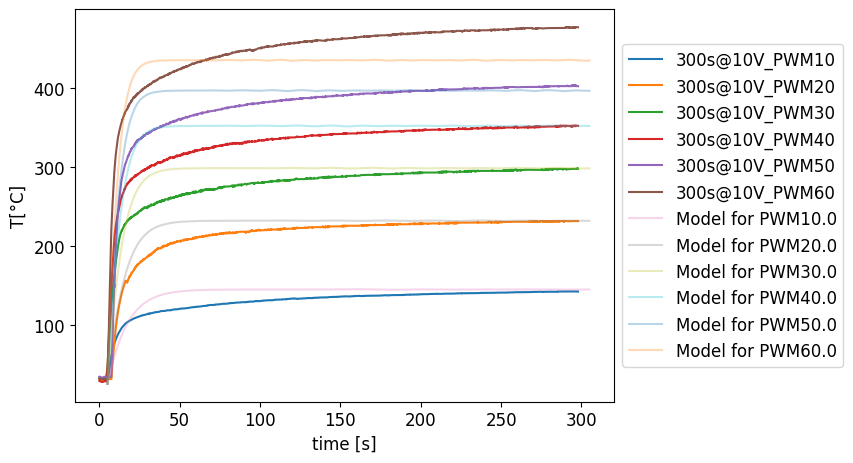

In [2]:
plot_F_corrected("./To_plot/","")

for i in [0.10,0.20,0.30,0.40,0.50,0.60]:
    T,t = model_predict(0, 300, i)
    sn.lineplot(x=t+5,y=T-273,alpha=0.3,label="Model for PWM{}".format(i*100))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

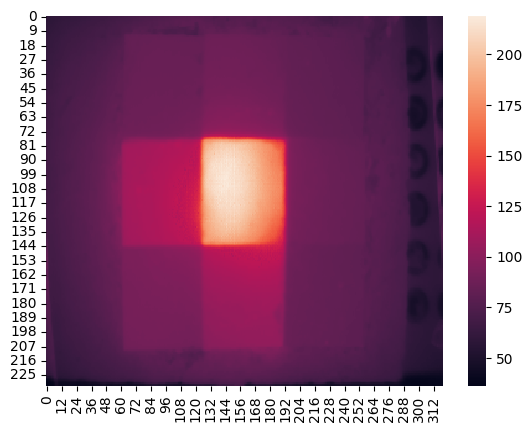

In [30]:
frames = pd.read_pickle("D:/{}".format("Data_PKL\\300s@10V_PWM50-Si"))
sn.heatmap(frames.img[len(frames)-1])


Text(0, 0.5, 'Temperature [°C]')

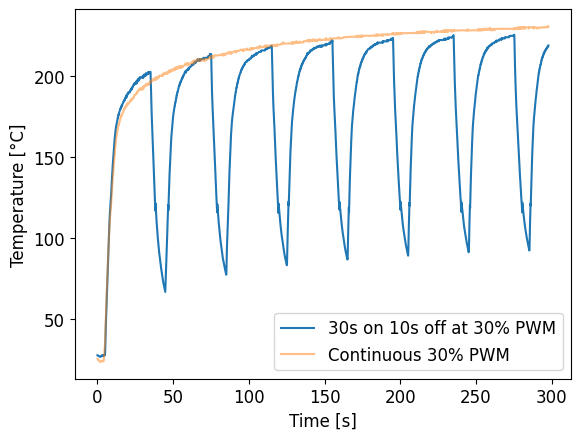

In [9]:
path = "D:\Data_PKL\\300s@10v_PWM30_ONOFF_30_10"
frames = pd.read_pickle("{}".format(path))
slice = get_slice(frames, 120)


path = "D:\Data_PKL\\300s@10v_PWM30"
frames2 = pd.read_pickle("{}".format(path))
slice2 = get_slice(frames2, 120)
sn.lineplot(y=np.transpose(slice)[int(len(np.transpose(slice))/2)], x=frames.DT, label = "30s on 10s off at 30% PWM")
sn.lineplot(y=np.transpose(slice2)[int(len(np.transpose(slice2))/2)], x=frames2.DT, alpha = 0.5, label = "Continuous 30% PWM")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")



Text(0, 0.5, 'Temperature [°C]')

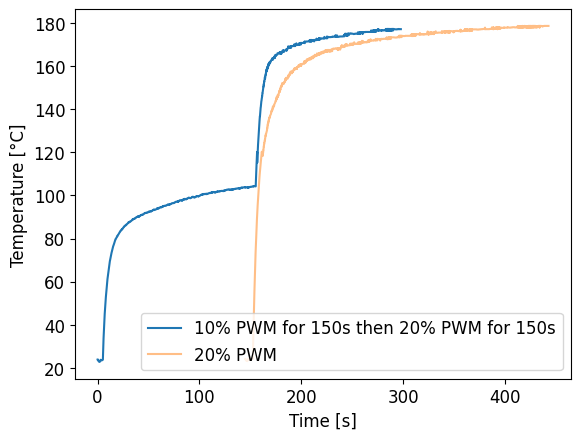

In [27]:
path = "D:\Data_PKL\\300s@10V_PWM(10-20)"
frames = pd.read_pickle("{}".format(path))
slice = get_slice(frames, 120)


path = "D:\Data_PKL\\300s@10v_PWM20"
frames2 = pd.read_pickle("{}".format(path))
slice2 = get_slice(frames2, 120)
sn.lineplot(y=np.transpose(slice)[int(len(np.transpose(slice))/2)], x=frames.DT, label = "10% PWM for 150s then 20% PWM for 150s")
sn.lineplot(y=np.transpose(slice2)[int(len(np.transpose(slice2))/2)], x=frames2.DT+145, alpha = 0.5, label = "20% PWM")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")

Text(0, 0.5, 'Temperature (relative to T[0]) [°C]')

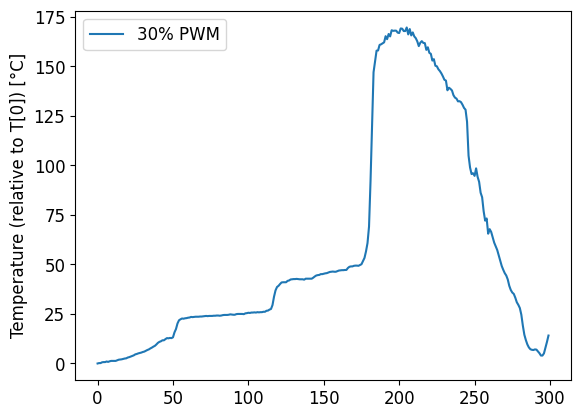

In [11]:
path = "D:\Data_PKL\\A2@PWM30"
frames = pd.read_pickle("{}".format(path))
slice = get_slice(frames, 120)
sn.lineplot(slice[-1][10:-10]-slice[-1][10],label = "30% PWM")
# plt.xlabel("Time [s]")
plt.ylabel("Temperature (relative to T[0]) [°C]")

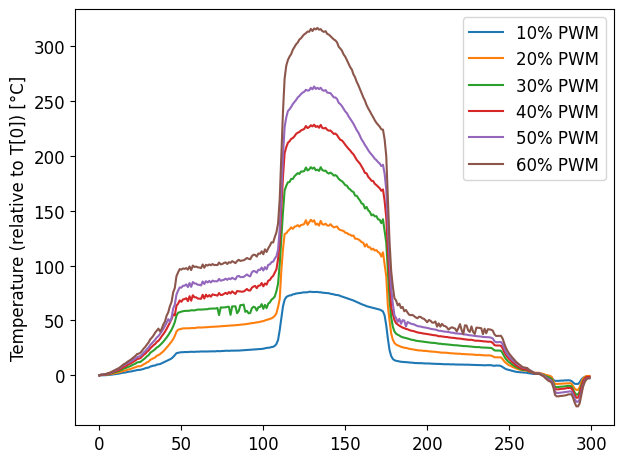

In [12]:
mats = ["D:\Data_PKL\\300s@10V_PWM10",
        "D:\Data_PKL\\300s@10V_PWM20",
        "D:\Data_PKL\\300s@10V_PWM30",
        "D:\Data_PKL\\300s@10V_PWM40",
        "D:\Data_PKL\\300s@10V_PWM50",
        "D:\Data_PKL\\300s@10V_PWM60"]
labels = ["10% PWM","20% PWM", "30% PWM","40% PWM","50% PWM","60% PWM"]
# _, axs = plt.subplots(1,5,figsize= (20,5), sharex= False, sharey=False)
# axs = axs.ravel()
for mat,label in zip(mats,labels):
    frames = pd.read_pickle("{}".format(mat))
    slice = get_slice(frames, 120)
    sn.lineplot(slice[-1][10:-10]-slice[-1][10],label = label)

# sn.lineplot([[0]*100+[80]*60+ [0]*(300-100-60)], label = "Ideal case", alpha = 0.5)
plt.ylabel("Temperature (relative to T[0]) [°C]")
plt.tight_layout()
plt.show()

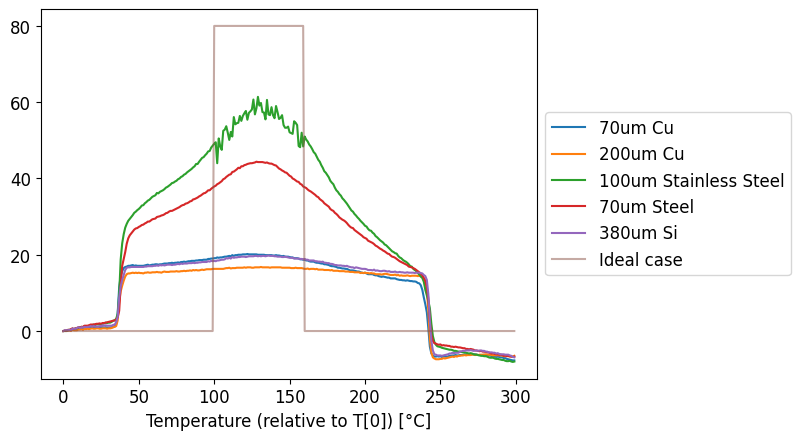

In [16]:
mats = ["D:\Data_PKL\A1@PWM30-Cu70um-tape",
        "D:\Data_PKL\A1@PWM30-Cu200um-tape",
        "D:\Data_PKL\A1@PWM30-St100um-tape", 
        "D:\Data_PKL\A1@PWM30-St70um-tape", 
        "D:\Data_PKL\A1@PWM30-Si-tape"]
labels = ["70um Cu", "200um Cu","100um Stainless Steel","70um Steel","380um Si"]
# _, axs = plt.subplots(1,5,figsize= (20,5), sharex= False, sharey=False)
# axs = axs.ravel()
for mat,label in zip(mats,labels):
    frames = pd.read_pickle("{}".format(mat))
    slice = get_slice(frames, 120)
    sn.lineplot(slice[-1][10:-10]-slice[-1][10],label = label)

sn.lineplot([0]*100+[80]*60+ [0]*(300-100-60), label = "Ideal case", alpha = 0.5)
plt.xlabel("Temperature (relative to T[0]) [°C]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
